<a href="https://colab.research.google.com/github/fujael-eee/Computer-Vision---Image-Processing-/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### MT:
#####Q1. Apply any histogram equalization technique to enhance the x-ray image. (given)

**Solution:**

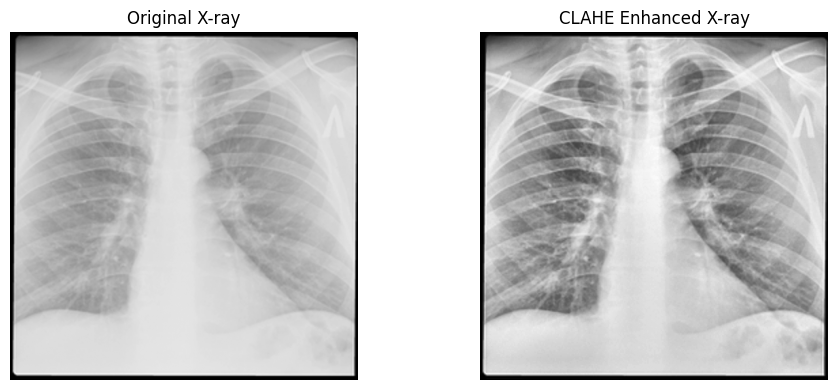

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the x-ray image
xray_img = cv2.imread('/content/drive/MyDrive/Image Folder/x-ray-1.png', cv2.IMREAD_GRAYSCALE)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
xray_clahe = clahe.apply(xray_img)

# Display the original and enhanced images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original X-ray")
plt.imshow(xray_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("CLAHE Enhanced X-ray")
plt.imshow(xray_clahe, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


####OT:
#### Apply different histogram equalization techniques on color image.

**Solution:**

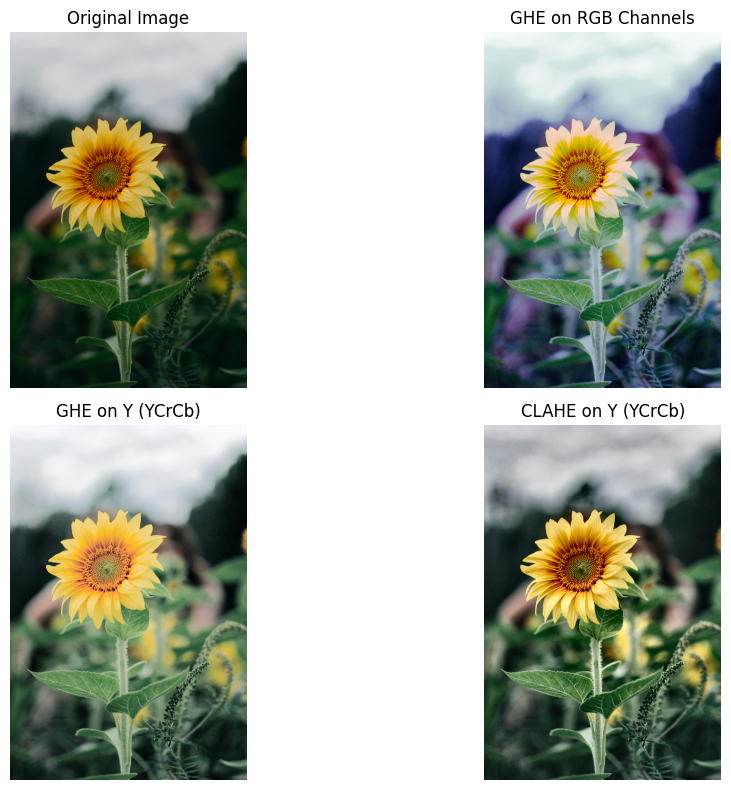

In [ ]:
# Load an color image
img = cv2.imread('/content/drive/MyDrive/Image Folder/pexels-maxandrey-1366630.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Global Histogram Equalization on each RGB channel
b, g, r = cv2.split(img)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)
img_eq_rgb = cv2.merge((r_eq, g_eq, b_eq))

# 2. Equalize Y channel in YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(img_ycrcb)
y_eq = cv2.equalizeHist(y)
img_y_eq = cv2.merge((y_eq, cr, cb))
img_y_eq_rgb = cv2.cvtColor(img_y_eq, cv2.COLOR_YCrCb2RGB)

# 3. CLAHE on Y channel in YCrCb
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
y_clahe = clahe.apply(y)
img_clahe_y = cv2.merge((y_clahe, cr, cb))
img_clahe_rgb = cv2.cvtColor(img_clahe_y, cv2.COLOR_YCrCb2RGB)

# Show all results
titles = ['Original Image', 'GHE on RGB Channels', 'GHE on Y (YCrCb)', 'CLAHE on Y (YCrCb)']
images = [img_rgb, img_eq_rgb, img_y_eq_rgb, img_clahe_rgb]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
